# Introduction
Name:  

    DARE_AAC_analysis

Purpose:  

    Based on Meloë's study for global DARE, using calipso, MODIS, and other measurements.
    Find the dependence of DARE on clod properties, subset for certain aerosols types and surface albedo types
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - scipy : for saving and reading
    - mplt_toolkits for basemap, map plotting
    - pdb
    - datetime
    - Run_libradtran

  
Needed Files:

  - matlab input files: Input_to_DARF_mmm.mat

# Imports and file path setup

In [2]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import scipy.io as sio
from mpl_toolkits.basemap import Basemap

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
import Run_libradtran as RL
reload(RL)

<module 'Run_libradtran' from 'Run_libradtran.pyc'>

In [4]:
fp = 'C:\Users\sleblan2\Research\Calipso\meloe/'

# Load the required files

In [5]:
input_DJF = sio.loadmat(fp+'Input_to_DARF_DJF.mat',mat_dtype=True)['data_input_darf']

In [6]:
input_DJF.dtype.names

('MODIS_N',
 'MODIS_lat',
 'MODIS_lon',
 'MODIS_COD_mean',
 'MODIS_effrad_mean',
 'MODIS_COD_median',
 'MODIS_effrad_median',
 'MODIS_COD_std',
 'MODIS_Effrad_std',
 'MOC_ext_median',
 'MOC_ext_mean',
 'MOC_ssa_median',
 'MOC_ssa_mean',
 'MOC_asym_median',
 'MOC_asym_mean',
 'MOC_ext_std',
 'MOC_ssa_std',
 'MOC_asym_std',
 'MOC_wavelengths',
 'CALIOP_AAC_DR_AOD_532')

In [7]:
DARE_DJF = sio.loadmat(fp+'DARF/DJF_DARF.mat')

In [8]:
DARE_DJF.keys()

['SW_DARF',
 'lon',
 '__header__',
 '__globals__',
 'LW_DARF',
 'zout',
 'lat',
 '__version__']

In [146]:
input_SON = sio.loadmat(fp+'Input_to_DARF_SON.mat',mat_dtype=True)['data_input_darf']

In [147]:
DARE_SON = sio.loadmat(fp+'DARF/SON_DARF.mat')

# Plot the DARE and cloud products

In [10]:
DARE_DJF['lon'].shape,input_DJF['MODIS_lon'][0,0].shape

((75L, 1L), (75L, 1L))

In [14]:
input_DJF['MODIS_COD_mean'][0,0].shape

(48L, 75L)

In [19]:
DARE_DJF['SW_DARF'].shape

(3L, 48L, 75L)

In [23]:
DARE_DJF['zout']

array([[  0],
       [  3],
       [100]], dtype=int64)

In [86]:
def contour_it(x,y,z):
    from scipy.interpolate import griddata
    # make a regular grid and interpolate the date within it
    x1 = np.linspace(1,150,75)
    y1 = np.linspace(5,25,20)
    z = griddata((x.flatten(), y.flatten()), 
                 z.flatten(), 
                 (x1[None,:], y1[:,None]), method='linear')
    return x1,y1,z

<IPython.core.display.Javascript object>


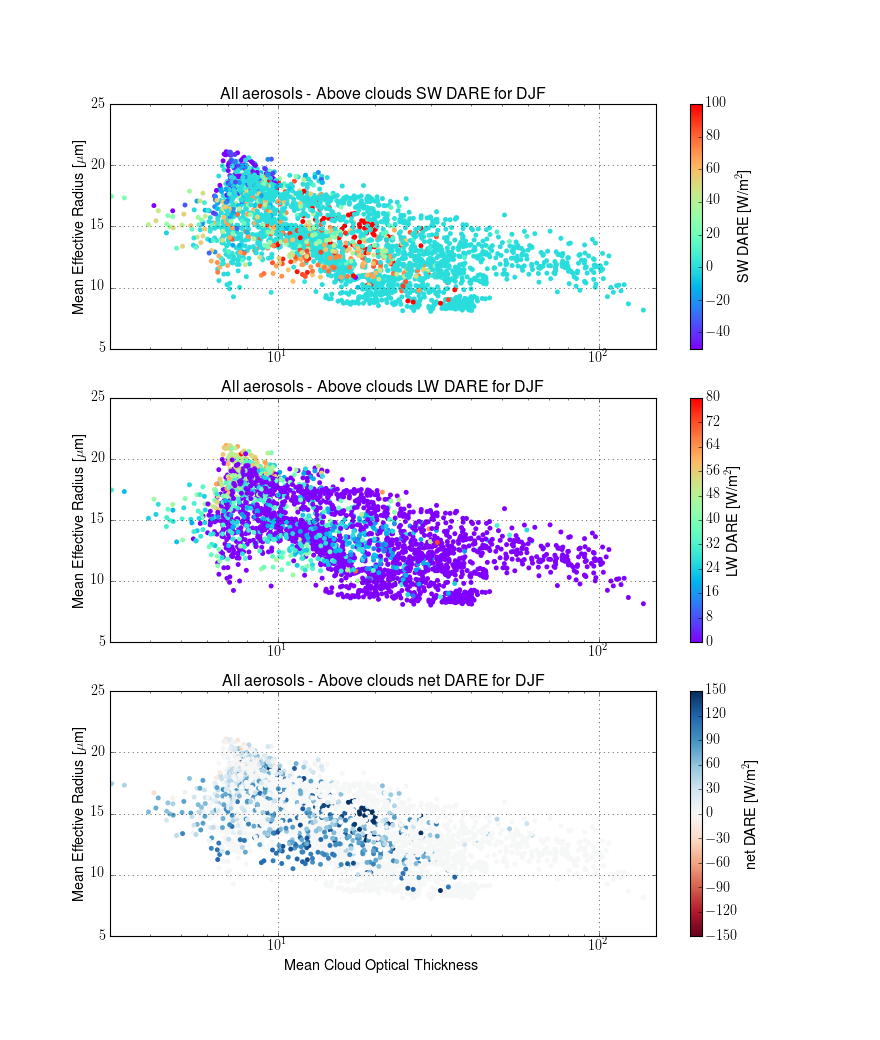

In [136]:
plt.figure(figsize=(11,13))
ax1 = plt.subplot(311)
sc = ax1.scatter(input_DJF['MODIS_COD_mean'][0,0].flatten(),input_DJF['MODIS_effrad_mean'][0,0].flatten(),
            c=DARE_DJF['SW_DARF'][2,:,:].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=-50,vmax=100)
cbar = plt.colorbar(sc,ax=ax1)
cbar.set_label('SW DARE [W/m$^{2}$]')
x1,y1,z = contour_it(input_DJF['MODIS_COD_mean'][0,0],input_DJF['MODIS_effrad_mean'][0,0],DARE_DJF['SW_DARF'][2,:,:])
#CS = ax1.contour(x1,y1,z,colors='k')
#ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_xlim([3,150])
ax1.set_xscale('log')
ax1.set_ylim([5,25])
ax1.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax1.set_xlabel('Mean Cloud Optical Thickness')
ax1.set_title('All aerosols - Above clouds SW DARE for DJF')
ax1.grid()

ax2 = plt.subplot(312,sharex=ax1)
sc = ax2.scatter(input_DJF['MODIS_COD_mean'][0,0].flatten(),input_DJF['MODIS_effrad_mean'][0,0].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=0,vmax=80)
cbar = plt.colorbar(sc,ax=ax2)
cbar.set_label('LW DARE [W/m$^{2}$]')
ax2.set_xlim([3,150])
ax2.set_xscale('log')
ax2.set_ylim([5,25])
ax2.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax2.set_xlabel('Mean Cloud Optical Thickness')
ax2.set_title('All aerosols - Above clouds LW DARE for DJF')
ax2.grid()

cl2 = np.linspace(-150,150,41)
ax3 = plt.subplot(313,sharex=ax1)
sc = ax3.scatter(input_DJF['MODIS_COD_mean'][0,0].flatten(),input_DJF['MODIS_effrad_mean'][0,0].flatten(),
                 c=DARE_DJF['LW_DARF'][2,:,:].flatten()+DARE_DJF['SW_DARF'][2,:,:].flatten(),
                 vmin=-150,vmax=150,cmap=plt.cm.RdBu,edgecolor='None')
cbar = plt.colorbar(sc,ax=ax3)
cbar.set_label('net DARE [W/m$^{2}$]')
ax3.set_xlim([3,150])
ax3.set_xscale('log')
ax3.set_ylim([5,25])
ax3.set_ylabel('Mean Effective Radius [$\\mu$m]')
ax3.set_xlabel('Mean Cloud Optical Thickness')
ax3.set_title('All aerosols - Above clouds net DARE for DJF')
ax3.grid()

plt.savefig(fp+'plots/DARE_vs_cod_ref_all_aero_DJF.png',transparent=True,dpi=600)

In [89]:
input_DJF.dtype.names

('MODIS_N',
 'MODIS_lat',
 'MODIS_lon',
 'MODIS_COD_mean',
 'MODIS_effrad_mean',
 'MODIS_COD_median',
 'MODIS_effrad_median',
 'MODIS_COD_std',
 'MODIS_Effrad_std',
 'MOC_ext_median',
 'MOC_ext_mean',
 'MOC_ssa_median',
 'MOC_ssa_mean',
 'MOC_asym_median',
 'MOC_asym_mean',
 'MOC_ext_std',
 'MOC_ssa_std',
 'MOC_asym_std',
 'MOC_wavelengths',
 'CALIOP_AAC_DR_AOD_532')

In [96]:
input_DJF['MOC_wavelengths'][0,0][0,8]

0.54625000000000001

In [126]:
ii95 = input_DJF['MOC_ssa_mean'][0,0][:,:,8]>0.95

<IPython.core.display.Javascript object>


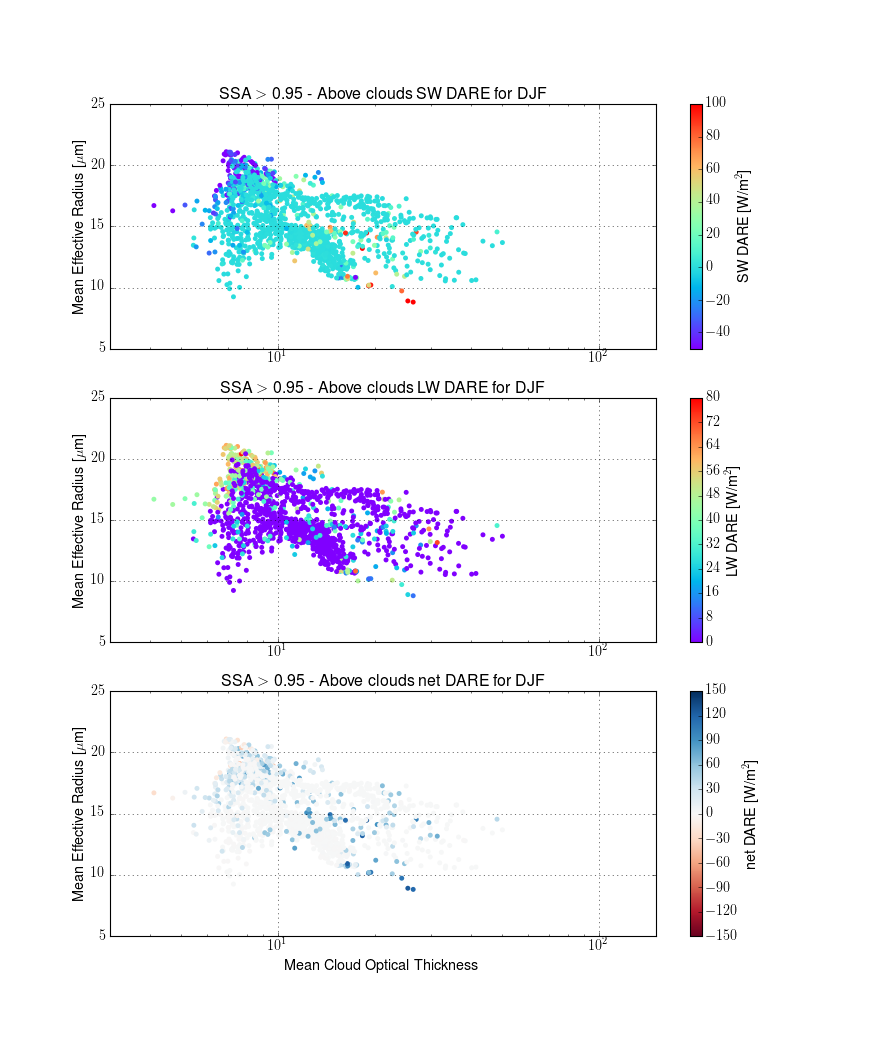

In [137]:
plt.figure(figsize=(11,13))
ax1 = plt.subplot(311)
sc = ax1.scatter(input_DJF['MODIS_COD_mean'][0,0][ii95].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii95].flatten(),
            c=DARE_DJF['SW_DARF'][2,:,:][ii95].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=-50,vmax=100)
cbar = plt.colorbar(sc,ax=ax1)
cbar.set_label('SW DARE [W/m$^{2}$]')
x1,y1,z = contour_it(input_DJF['MODIS_COD_mean'][0,0],input_DJF['MODIS_effrad_mean'][0,0],DARE_DJF['SW_DARF'][2,:,:])
#CS = ax1.contour(x1,y1,z,colors='k')
#ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_xlim([3,150])
ax1.set_xscale('log')
ax1.set_ylim([5,25])
ax1.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax1.set_xlabel('Mean Cloud Optical Thickness')
ax1.set_title('SSA $>$ 0.95 - Above clouds SW DARE for DJF')
ax1.grid()

ax2 = plt.subplot(312,sharex=ax1)
sc = ax2.scatter(input_DJF['MODIS_COD_mean'][0,0][ii95].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii95].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:][ii95].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=0,vmax=80)
cbar = plt.colorbar(sc,ax=ax2)
cbar.set_label('LW DARE [W/m$^{2}$]')
ax2.set_xlim([3,150])
ax2.set_xscale('log')
ax2.set_ylim([5,25])
ax2.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax2.set_xlabel('Mean Cloud Optical Thickness')
ax2.set_title('SSA $>$ 0.95 - Above clouds LW DARE for DJF')
ax2.grid()

cl2 = np.linspace(-150,150,41)
ax3 = plt.subplot(313,sharex=ax1)
sc = ax3.scatter(input_DJF['MODIS_COD_mean'][0,0][ii95].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii95].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:][ii95].flatten()+DARE_DJF['SW_DARF'][2,:,:][ii95].flatten(),
                 vmin=-150,vmax=150,cmap=plt.cm.RdBu,edgecolor='None')
cbar = plt.colorbar(sc,ax=ax3)
cbar.set_label('net DARE [W/m$^{2}$]')
ax3.set_xlim([3,150])
ax3.set_xscale('log')
ax3.set_ylim([5,25])
ax3.set_ylabel('Mean Effective Radius [$\\mu$m]')
ax3.set_xlabel('Mean Cloud Optical Thickness')
ax3.set_title('SSA $>$ 0.95 - Above clouds net DARE for DJF')
ax3.grid()

plt.savefig(fp+'plots/DARE_vs_cod_ref_ssa0.95_DJF.png',transparent=True,dpi=600)

In [133]:
ii80 = input_DJF['MOC_ssa_mean'][0,0][:,:,8]<0.8

<IPython.core.display.Javascript object>


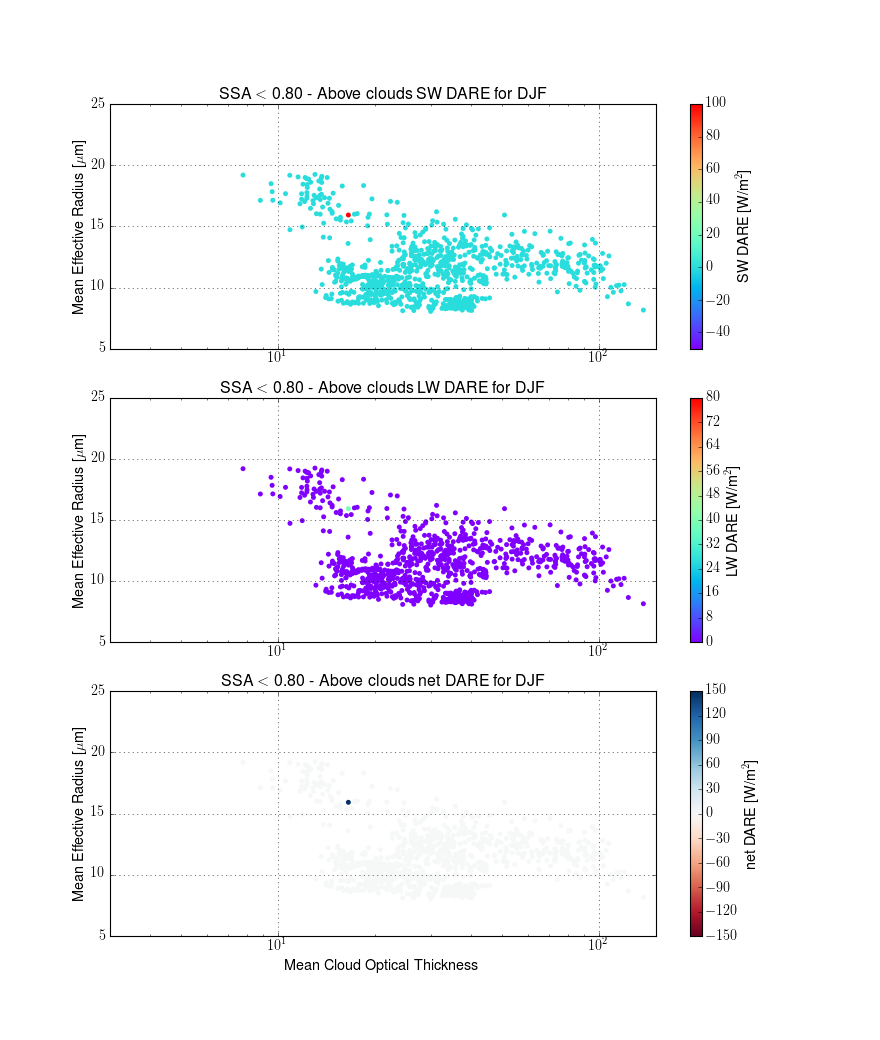

In [138]:
plt.figure(figsize=(11,13))
ax1 = plt.subplot(311)
sc = ax1.scatter(input_DJF['MODIS_COD_mean'][0,0][ii80].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii80].flatten(),
            c=DARE_DJF['SW_DARF'][2,:,:][ii80].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=-50,vmax=100)
cbar = plt.colorbar(sc,ax=ax1)
cbar.set_label('SW DARE [W/m$^{2}$]')
x1,y1,z = contour_it(input_DJF['MODIS_COD_mean'][0,0],input_DJF['MODIS_effrad_mean'][0,0],DARE_DJF['SW_DARF'][2,:,:])
#CS = ax1.contour(x1,y1,z,colors='k')
#ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_xlim([3,150])
ax1.set_xscale('log')
ax1.set_ylim([5,25])
ax1.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax1.set_xlabel('Mean Cloud Optical Thickness')
ax1.set_title('SSA $<$ 0.80 - Above clouds SW DARE for DJF')
ax1.grid()

ax2 = plt.subplot(312,sharex=ax1)
sc = ax2.scatter(input_DJF['MODIS_COD_mean'][0,0][ii80].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii80].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:][ii80].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=0,vmax=80)
cbar = plt.colorbar(sc,ax=ax2)
cbar.set_label('LW DARE [W/m$^{2}$]')
ax2.set_xlim([3,150])
ax2.set_xscale('log')
ax2.set_ylim([5,25])
ax2.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax2.set_xlabel('Mean Cloud Optical Thickness')
ax2.set_title('SSA $<$ 0.80 - Above clouds LW DARE for DJF')
ax2.grid()

cl2 = np.linspace(-150,150,41)
ax3 = plt.subplot(313,sharex=ax1)
sc = ax3.scatter(input_DJF['MODIS_COD_mean'][0,0][ii80].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii80].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:][ii80].flatten()+DARE_DJF['SW_DARF'][2,:,:][ii80].flatten(),
                 vmin=-150,vmax=150,cmap=plt.cm.RdBu,edgecolor='None')
cbar = plt.colorbar(sc,ax=ax3)
cbar.set_label('net DARE [W/m$^{2}$]')
ax3.set_xlim([3,150])
ax3.set_xscale('log')
ax3.set_ylim([5,25])
ax3.set_ylabel('Mean Effective Radius [$\\mu$m]')
ax3.set_xlabel('Mean Cloud Optical Thickness')
ax3.set_title('SSA $<$ 0.80 - Above clouds net DARE for DJF')
ax3.grid()

plt.savefig(fp+'plots/DARE_vs_cod_ref_ssa0.80_DJF.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


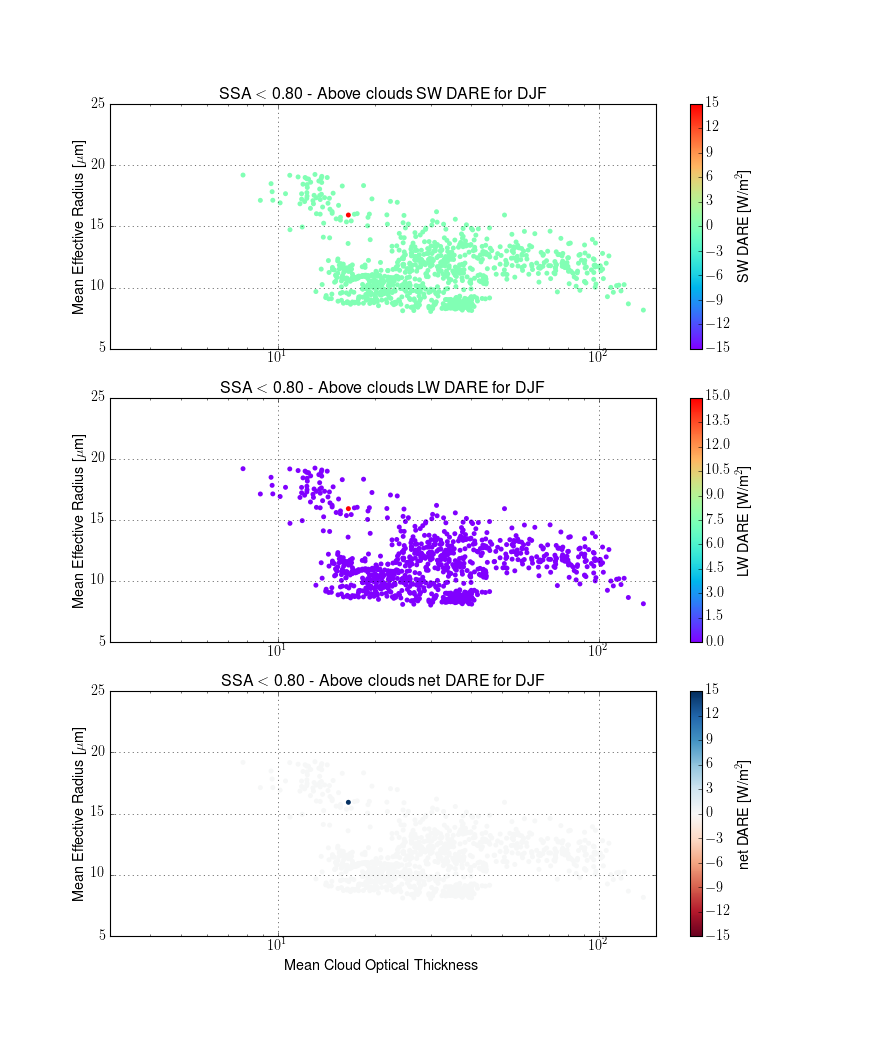

In [145]:
plt.figure(figsize=(11,13))
ax1 = plt.subplot(311)
sc = ax1.scatter(input_DJF['MODIS_COD_mean'][0,0][ii80].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii80].flatten(),
            c=DARE_DJF['SW_DARF'][2,:,:][ii80].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=-15,vmax=15)
cbar = plt.colorbar(sc,ax=ax1)
cbar.set_label('SW DARE [W/m$^{2}$]')
x1,y1,z = contour_it(input_DJF['MODIS_COD_mean'][0,0],input_DJF['MODIS_effrad_mean'][0,0],DARE_DJF['SW_DARF'][2,:,:])
#CS = ax1.contour(x1,y1,z,colors='k')
#ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_xlim([3,150])
ax1.set_xscale('log')
ax1.set_ylim([5,25])
ax1.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax1.set_xlabel('Mean Cloud Optical Thickness')
ax1.set_title('SSA $<$ 0.80 - Above clouds SW DARE for DJF')
ax1.grid()

ax2 = plt.subplot(312,sharex=ax1)
sc = ax2.scatter(input_DJF['MODIS_COD_mean'][0,0][ii80].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii80].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:][ii80].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=0,vmax=15)
cbar = plt.colorbar(sc,ax=ax2)
cbar.set_label('LW DARE [W/m$^{2}$]')
ax2.set_xlim([3,150])
ax2.set_xscale('log')
ax2.set_ylim([5,25])
ax2.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax2.set_xlabel('Mean Cloud Optical Thickness')
ax2.set_title('SSA $<$ 0.80 - Above clouds LW DARE for DJF')
ax2.grid()

cl2 = np.linspace(-150,150,41)
ax3 = plt.subplot(313,sharex=ax1)
sc = ax3.scatter(input_DJF['MODIS_COD_mean'][0,0][ii80].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii80].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:][ii80].flatten()+DARE_DJF['SW_DARF'][2,:,:][ii80].flatten(),
                 vmin=-15,vmax=15,cmap=plt.cm.RdBu,edgecolor='None')
cbar = plt.colorbar(sc,ax=ax3)
cbar.set_label('net DARE [W/m$^{2}$]')
ax3.set_xlim([3,150])
ax3.set_xscale('log')
ax3.set_ylim([5,25])
ax3.set_ylabel('Mean Effective Radius [$\\mu$m]')
ax3.set_xlabel('Mean Cloud Optical Thickness')
ax3.set_title('SSA $<$ 0.80 - Above clouds net DARE for DJF')
ax3.grid()

plt.savefig(fp+'plots/DARE_vs_cod_ref_ssa0.80_DJF_sub.png',transparent=True,dpi=600)

In [139]:
ii90 = (input_DJF['MOC_ssa_mean'][0,0][:,:,8]>0.8) & (input_DJF['MOC_ssa_mean'][0,0][:,:,8]<0.95)

<IPython.core.display.Javascript object>


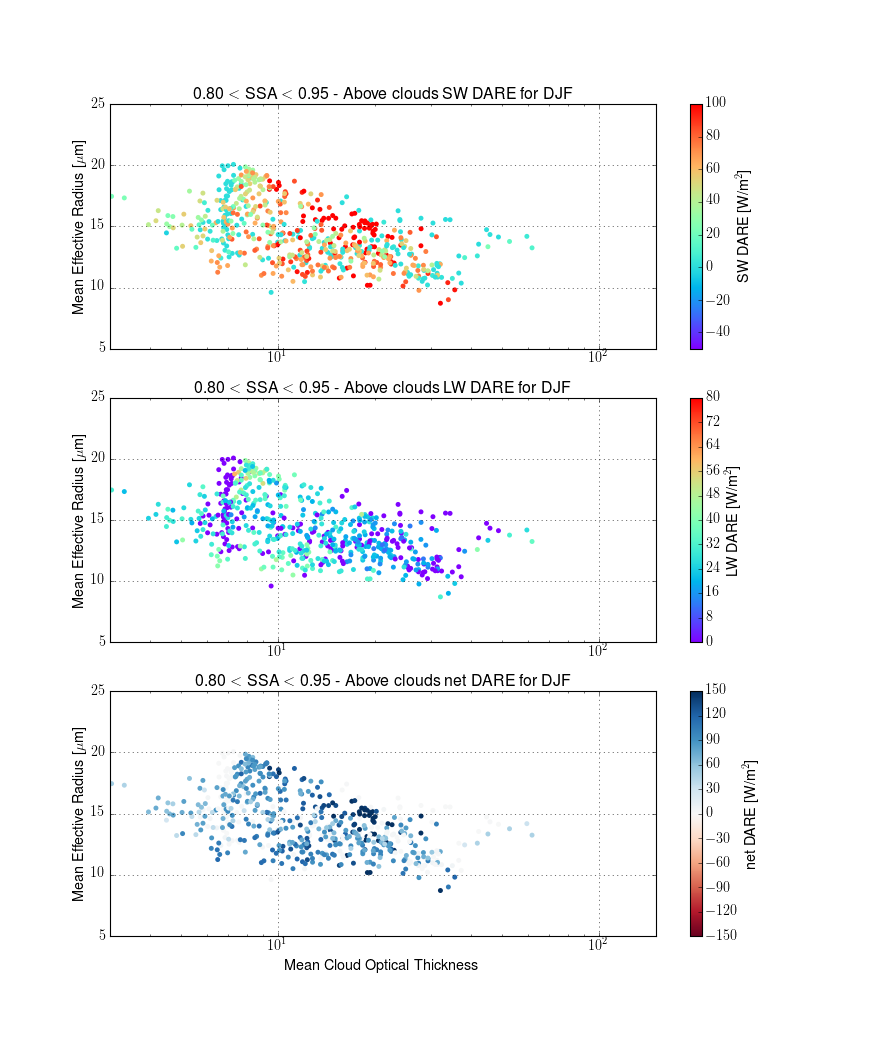

In [142]:
plt.figure(figsize=(11,13))
ax1 = plt.subplot(311)
sc = ax1.scatter(input_DJF['MODIS_COD_mean'][0,0][ii90].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii90].flatten(),
            c=DARE_DJF['SW_DARF'][2,:,:][ii90].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=-50,vmax=100)
cbar = plt.colorbar(sc,ax=ax1)
cbar.set_label('SW DARE [W/m$^{2}$]')
x1,y1,z = contour_it(input_DJF['MODIS_COD_mean'][0,0],input_DJF['MODIS_effrad_mean'][0,0],DARE_DJF['SW_DARF'][2,:,:])
#CS = ax1.contour(x1,y1,z,colors='k')
#ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_xlim([3,150])
ax1.set_xscale('log')
ax1.set_ylim([5,25])
ax1.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax1.set_xlabel('Mean Cloud Optical Thickness')
ax1.set_title('0.80 $<$ SSA $<$ 0.95 - Above clouds SW DARE for DJF')
ax1.grid()

ax2 = plt.subplot(312,sharex=ax1)
sc = ax2.scatter(input_DJF['MODIS_COD_mean'][0,0][ii90].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii90].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:][ii90].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=0,vmax=80)
cbar = plt.colorbar(sc,ax=ax2)
cbar.set_label('LW DARE [W/m$^{2}$]')
ax2.set_xlim([3,150])
ax2.set_xscale('log')
ax2.set_ylim([5,25])
ax2.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax2.set_xlabel('Mean Cloud Optical Thickness')
ax2.set_title('0.80 $<$ SSA $<$ 0.95 - Above clouds LW DARE for DJF')
ax2.grid()

cl2 = np.linspace(-150,150,41)
ax3 = plt.subplot(313,sharex=ax1)
sc = ax3.scatter(input_DJF['MODIS_COD_mean'][0,0][ii90].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii90].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:][ii90].flatten()+DARE_DJF['SW_DARF'][2,:,:][ii90].flatten(),
                 vmin=-150,vmax=150,cmap=plt.cm.RdBu,edgecolor='None')
cbar = plt.colorbar(sc,ax=ax3)
cbar.set_label('net DARE [W/m$^{2}$]')
ax3.set_xlim([3,150])
ax3.set_xscale('log')
ax3.set_ylim([5,25])
ax3.set_ylabel('Mean Effective Radius [$\\mu$m]')
ax3.set_xlabel('Mean Cloud Optical Thickness')
ax3.set_title('0.80 $<$ SSA $<$ 0.95 - Above clouds net DARE for DJF')
ax3.grid()

plt.savefig(fp+'plots/DARE_vs_cod_ref_ssa0.90_DJF.png',transparent=True,dpi=600)

In [143]:
ii99 = input_DJF['MOC_ssa_mean'][0,0][:,:,8]>0.99

<IPython.core.display.Javascript object>


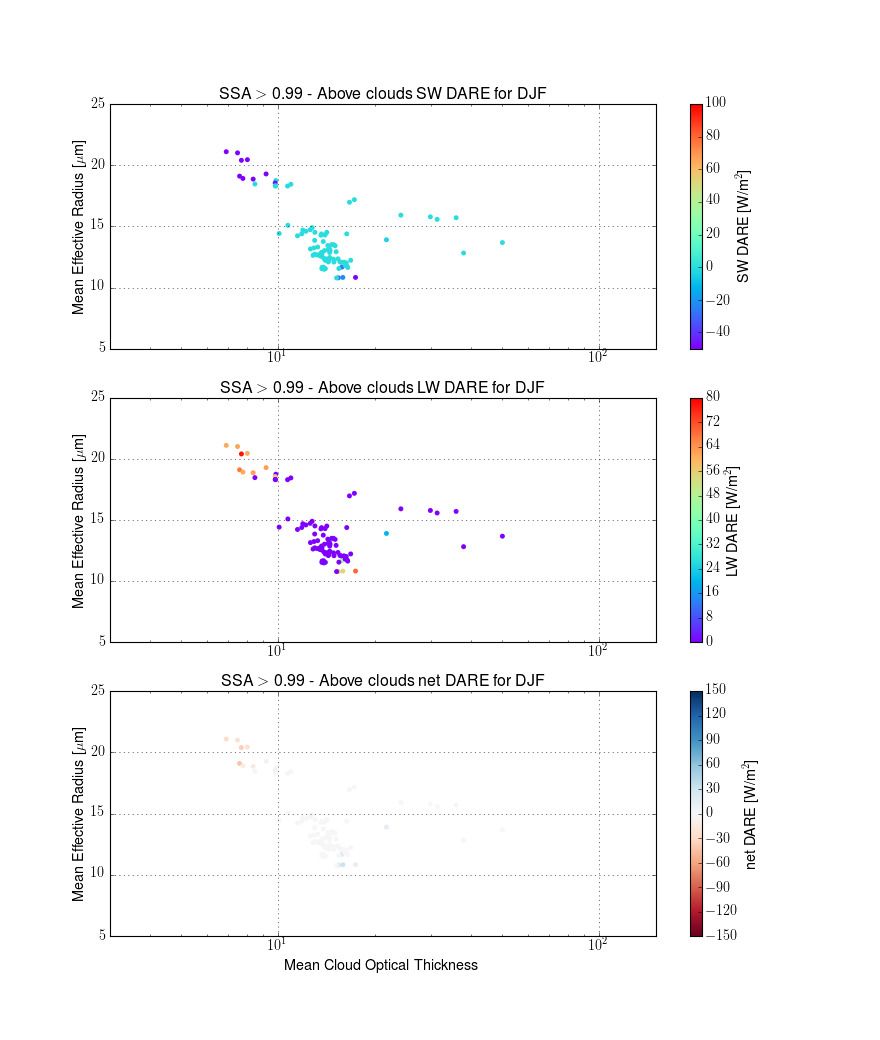

In [144]:
plt.figure(figsize=(11,13))
ax1 = plt.subplot(311)
sc = ax1.scatter(input_DJF['MODIS_COD_mean'][0,0][ii99].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii99].flatten(),
            c=DARE_DJF['SW_DARF'][2,:,:][ii99].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=-50,vmax=100)
cbar = plt.colorbar(sc,ax=ax1)
cbar.set_label('SW DARE [W/m$^{2}$]')
x1,y1,z = contour_it(input_DJF['MODIS_COD_mean'][0,0],input_DJF['MODIS_effrad_mean'][0,0],DARE_DJF['SW_DARF'][2,:,:])
#CS = ax1.contour(x1,y1,z,colors='k')
#ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_xlim([3,150])
ax1.set_xscale('log')
ax1.set_ylim([5,25])
ax1.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax1.set_xlabel('Mean Cloud Optical Thickness')
ax1.set_title('SSA $>$ 0.99 - Above clouds SW DARE for DJF')
ax1.grid()

ax2 = plt.subplot(312,sharex=ax1)
sc = ax2.scatter(input_DJF['MODIS_COD_mean'][0,0][ii99].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii99].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:][ii99].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=0,vmax=80)
cbar = plt.colorbar(sc,ax=ax2)
cbar.set_label('LW DARE [W/m$^{2}$]')
ax2.set_xlim([3,150])
ax2.set_xscale('log')
ax2.set_ylim([5,25])
ax2.set_ylabel('Mean Effective Radius [$\\mu$m]')
#ax2.set_xlabel('Mean Cloud Optical Thickness')
ax2.set_title('SSA $>$ 0.99 - Above clouds LW DARE for DJF')
ax2.grid()

cl2 = np.linspace(-150,150,41)
ax3 = plt.subplot(313,sharex=ax1)
sc = ax3.scatter(input_DJF['MODIS_COD_mean'][0,0][ii99].flatten(),input_DJF['MODIS_effrad_mean'][0,0][ii99].flatten(),
            c=DARE_DJF['LW_DARF'][2,:,:][ii99].flatten()+DARE_DJF['SW_DARF'][2,:,:][ii99].flatten(),
                 vmin=-150,vmax=150,cmap=plt.cm.RdBu,edgecolor='None')
cbar = plt.colorbar(sc,ax=ax3)
cbar.set_label('net DARE [W/m$^{2}$]')
ax3.set_xlim([3,150])
ax3.set_xscale('log')
ax3.set_ylim([5,25])
ax3.set_ylabel('Mean Effective Radius [$\\mu$m]')
ax3.set_xlabel('Mean Cloud Optical Thickness')
ax3.set_title('SSA $>$ 0.99 - Above clouds net DARE for DJF')
ax3.grid()

plt.savefig(fp+'plots/DARE_vs_cod_ref_ssa0.99_DJF.png',transparent=True,dpi=600)

## Redo plots for the SON times

In [151]:
def plot_dare(ii99,ss):
    plt.figure(figsize=(11,13))
    ax1 = plt.subplot(311)
    sc = ax1.scatter(input_SON['MODIS_COD_mean'][0,0][ii99].flatten(),input_SON['MODIS_effrad_mean'][0,0][ii99].flatten(),
                c=DARE_SON['SW_DARF'][2,:,:][ii99].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=-50,vmax=100)
    cbar = plt.colorbar(sc,ax=ax1)
    cbar.set_label('SW DARE [W/m$^{2}$]')
    x1,y1,z = contour_it(input_SON['MODIS_COD_mean'][0,0],input_SON['MODIS_effrad_mean'][0,0],DARE_SON['SW_DARF'][2,:,:])
    #CS = ax1.contour(x1,y1,z,colors='k')
    #ax1.clabel(CS, inline=1, fontsize=10)
    ax1.set_xlim([3,150])
    ax1.set_xscale('log')
    ax1.set_ylim([5,25])
    ax1.set_ylabel('Mean Effective Radius [$\\mu$m]')
    #ax1.set_xlabel('Mean Cloud Optical Thickness')
    ax1.set_title(ss +' - Above clouds SW DARE for SON')
    ax1.grid()

    ax2 = plt.subplot(312,sharex=ax1)
    sc = ax2.scatter(input_SON['MODIS_COD_mean'][0,0][ii99].flatten(),input_SON['MODIS_effrad_mean'][0,0][ii99].flatten(),
                c=DARE_SON['LW_DARF'][2,:,:][ii99].flatten(),cmap=plt.cm.rainbow,edgecolor='None',vmin=0,vmax=80)
    cbar = plt.colorbar(sc,ax=ax2)
    cbar.set_label('LW DARE [W/m$^{2}$]')
    ax2.set_xlim([3,150])
    ax2.set_xscale('log')
    ax2.set_ylim([5,25])
    ax2.set_ylabel('Mean Effective Radius [$\\mu$m]')
    #ax2.set_xlabel('Mean Cloud Optical Thickness')
    ax2.set_title(ss+' - Above clouds LW DARE for SON')
    ax2.grid()

    cl2 = np.linspace(-150,150,41)
    ax3 = plt.subplot(313,sharex=ax1)
    sc = ax3.scatter(input_SON['MODIS_COD_mean'][0,0][ii99].flatten(),input_SON['MODIS_effrad_mean'][0,0][ii99].flatten(),
                c=DARE_SON['LW_DARF'][2,:,:][ii99].flatten()+DARE_SON['SW_DARF'][2,:,:][ii99].flatten(),
                     vmin=-150,vmax=150,cmap=plt.cm.RdBu,edgecolor='None')
    cbar = plt.colorbar(sc,ax=ax3)
    cbar.set_label('net DARE [W/m$^{2}$]')
    ax3.set_xlim([3,150])
    ax3.set_xscale('log')
    ax3.set_ylim([5,25])
    ax3.set_ylabel('Mean Effective Radius [$\\mu$m]')
    ax3.set_xlabel('Mean Cloud Optical Thickness')
    ax3.set_title(ss+' - Above clouds net DARE for SON')
    ax3.grid()


<IPython.core.display.Javascript object>


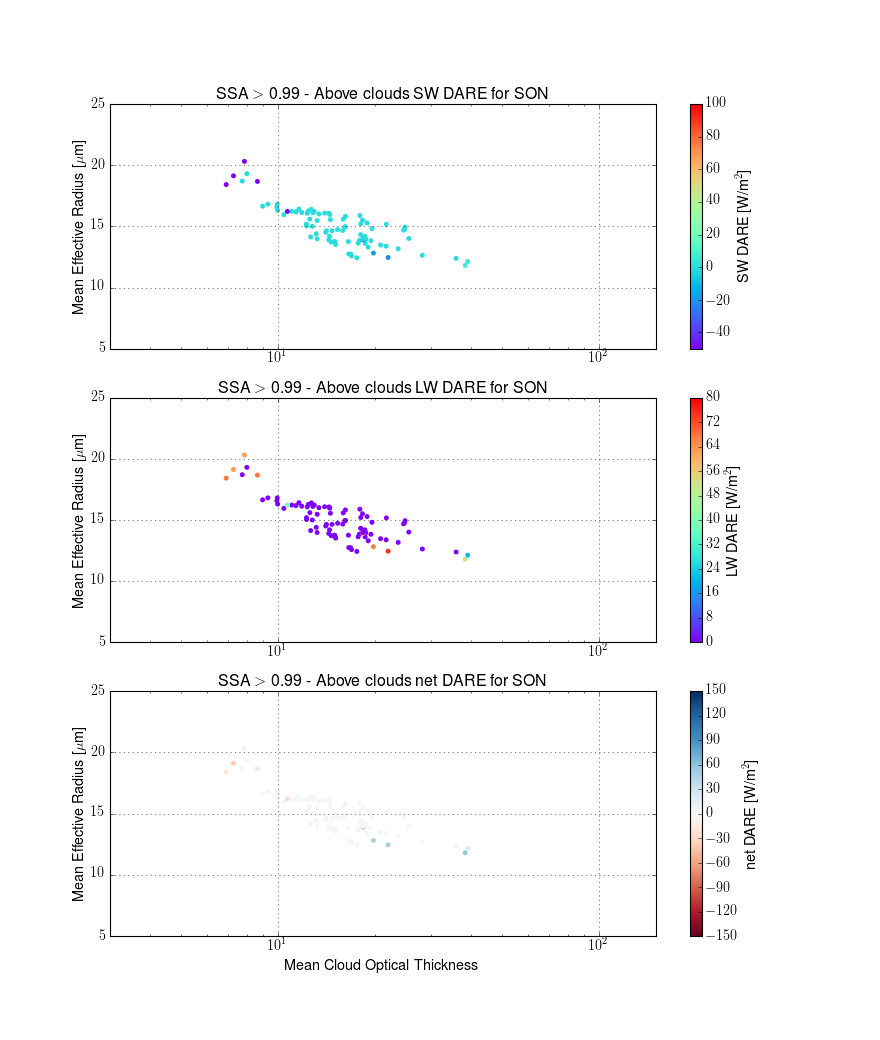

In [152]:
ii99 = input_SON['MOC_ssa_mean'][0,0][:,:,8]>0.99
plot_dare(ii99,'SSA $>$ 0.99')
plt.savefig(fp+'plots/DARE_vs_cod_ref_ssa0.99_SON.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


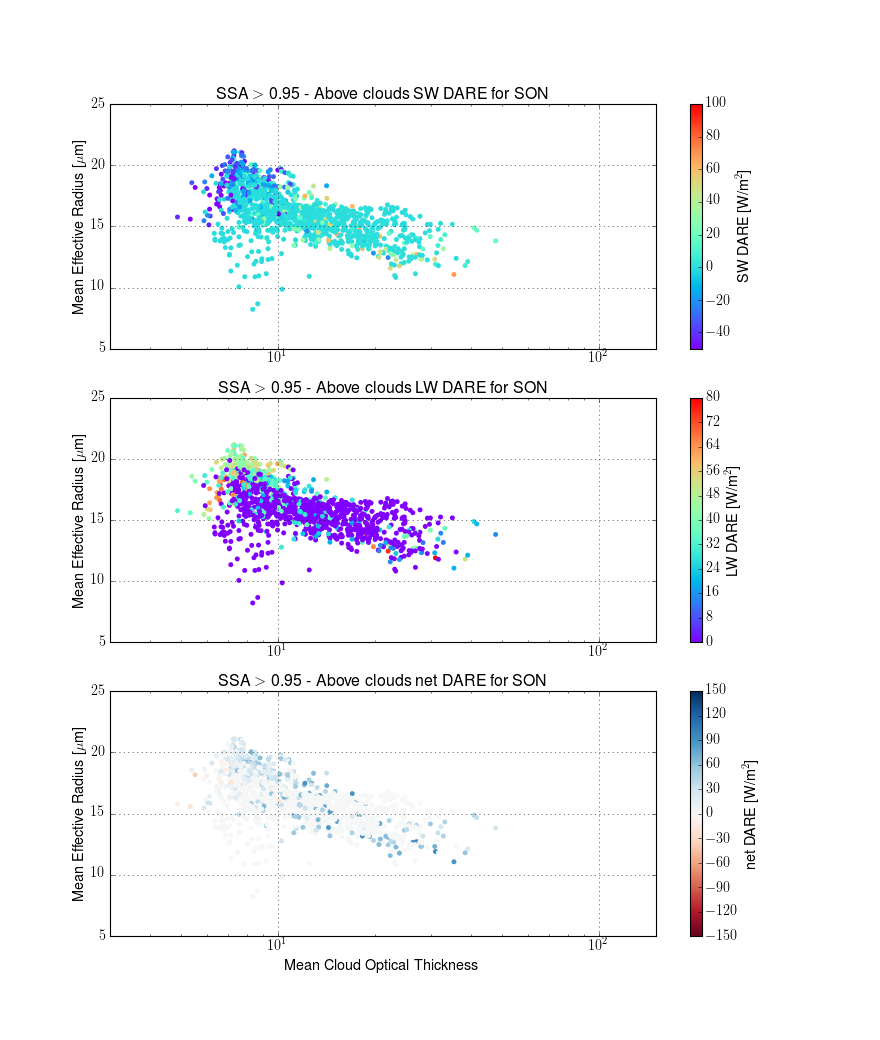

In [153]:
ii99 = input_SON['MOC_ssa_mean'][0,0][:,:,8]>0.95
plot_dare(ii99,'SSA $>$ 0.95')
plt.savefig(fp+'plots/DARE_vs_cod_ref_ssa0.95_SON.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


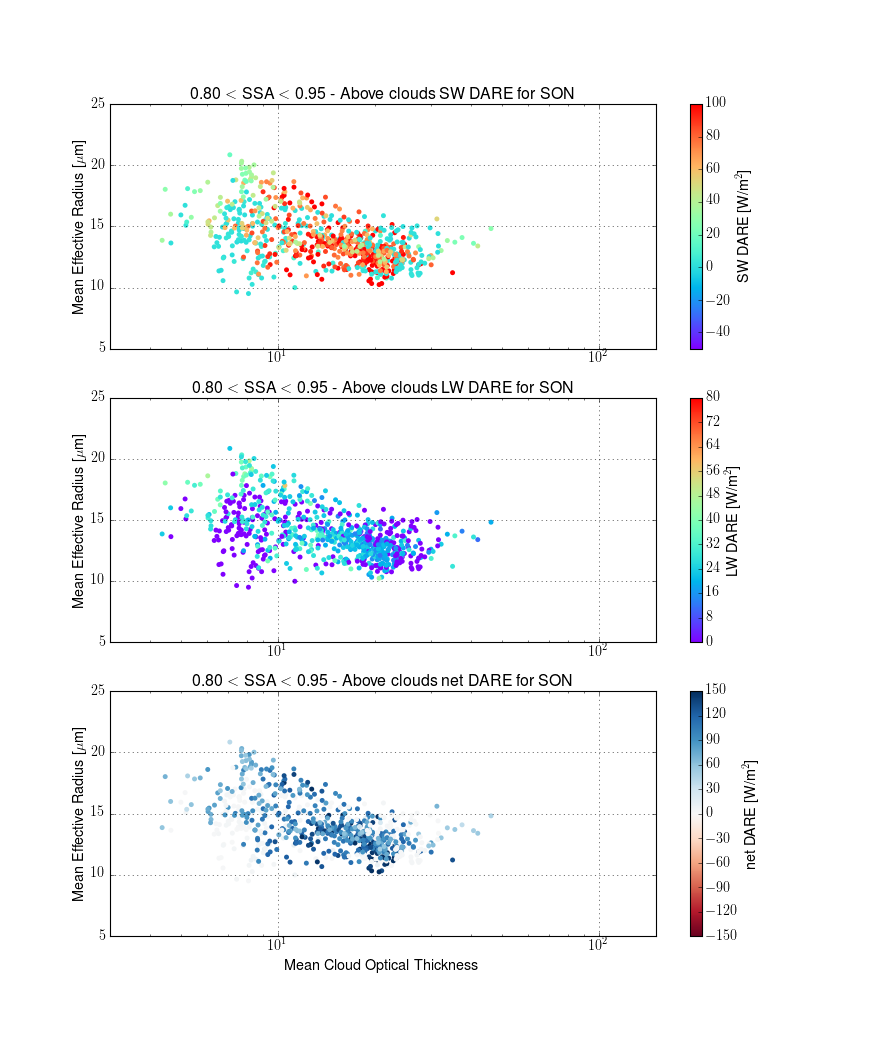

In [154]:
ii90 = (input_SON['MOC_ssa_mean'][0,0][:,:,8]>0.80) & (input_SON['MOC_ssa_mean'][0,0][:,:,8]<0.95)
plot_dare(ii90,'0.80 $<$ SSA $<$ 0.95')
plt.savefig(fp+'plots/DARE_vs_cod_ref_ssa0.90_SON.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


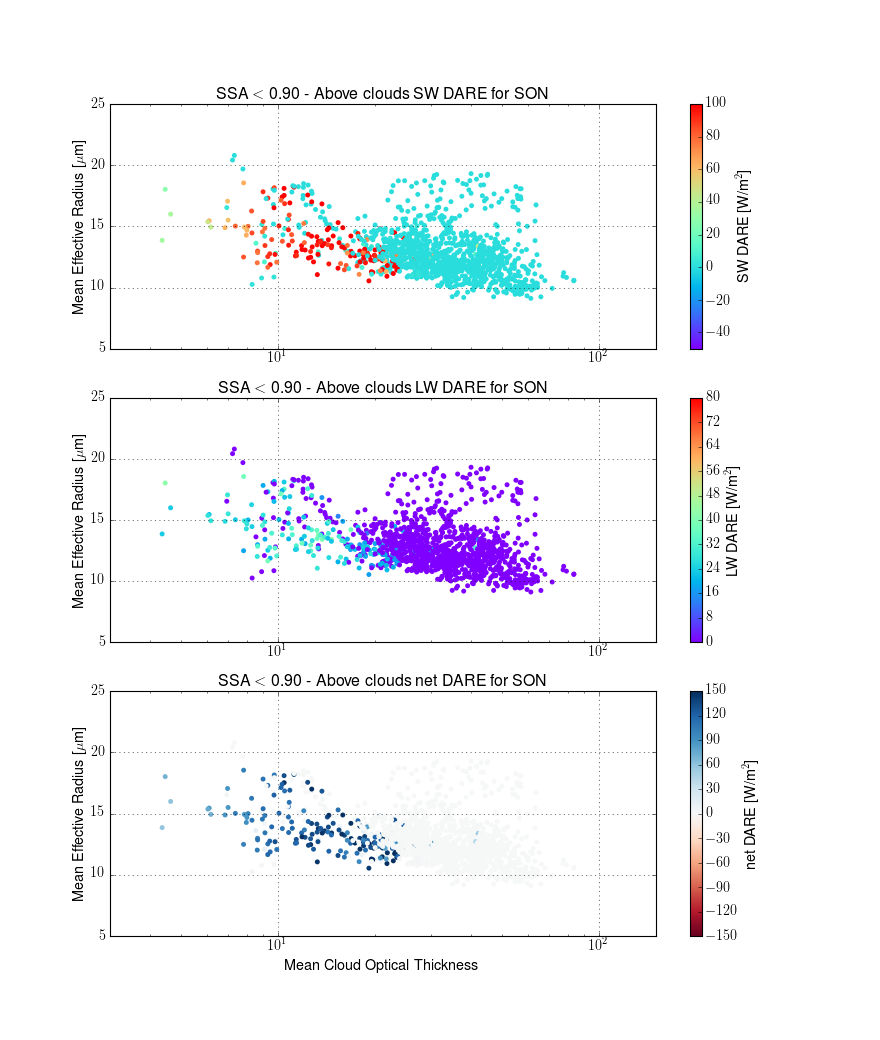

In [158]:
ii80 = input_SON['MOC_ssa_mean'][0,0][:,:,8]<0.90
plot_dare(ii80,'SSA $<$ 0.90')
plt.savefig(fp+'plots/DARE_vs_cod_ref_ssa0.9_SON.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


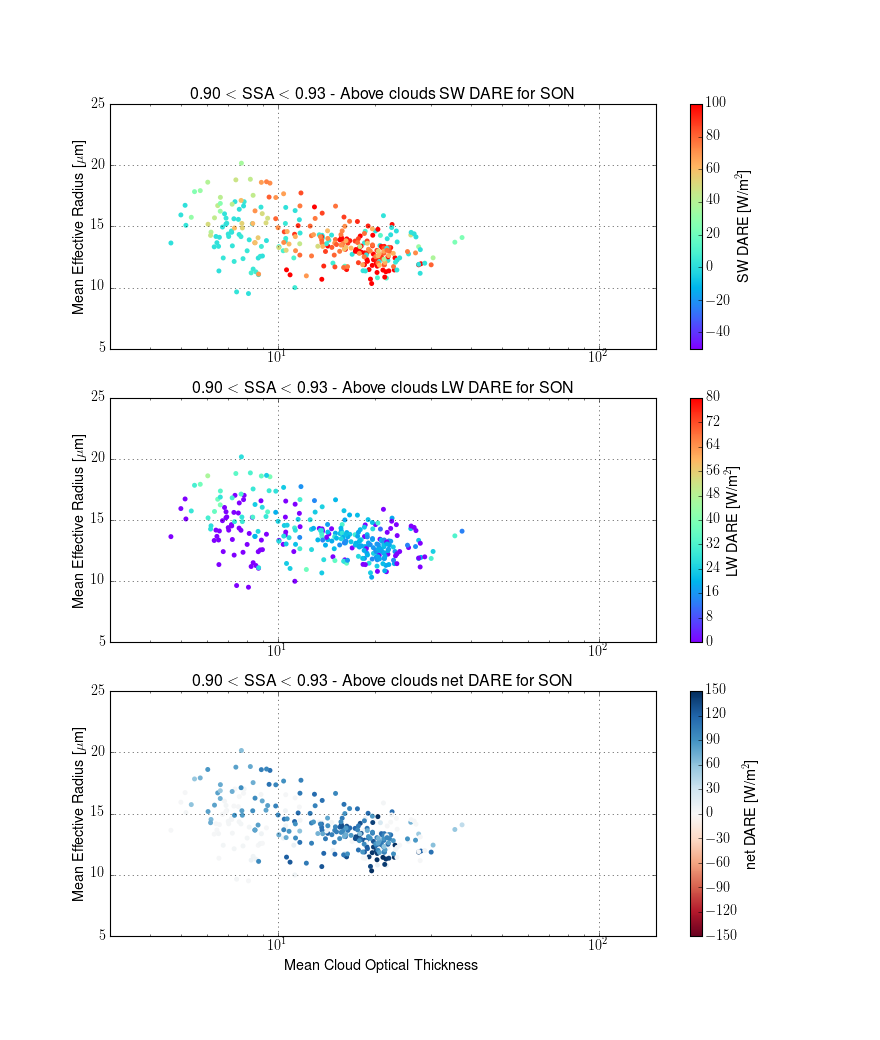

In [160]:
iii = (input_SON['MOC_ssa_mean'][0,0][:,:,8]>0.90) & (input_SON['MOC_ssa_mean'][0,0][:,:,8]<0.93)
plot_dare(iii,'0.90 $<$ SSA $<$ 0.93')
plt.savefig(fp+'plots/DARE_vs_cod_ref_ssa0.9_0.95_SON.png',transparent=True,dpi=600)